## Requirement
- In this assignment you are going to write to functions representing the two types of linear features explaine in the tutorial:
    - The mean (average filter)
    - The gaussian filter
- You are required to write the convolution process implemenation and compare your implemnation results with correlate 2d function

In [129]:
from scipy.signal import correlate2d
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [130]:
# TODO: Create function to create mean filter for an arbitary size
def create_mean_filter(ksize):
    assert ksize % 2 == 1, "Kernel size must be odd" #making sure the size is odd
    kernel = np.ones((ksize, ksize)) / (ksize * ksize) #initialize a kernel with size (ksize, ksize) and divide by the total number of elements
    return kernel #returns a kernel with each element is average of other elements

#create_mean_filter(7)

In [131]:
# TODO: Create function to create gaussian filter for an arbitary size
# This function can be implemented using a double loop but since we 
# have numpy we can try it without loops 
# check np.meshgrid https://www.geeksforgeeks.org/numpy-meshgrid-function/

def create_gaussian_filter(ksize, sigma):
  #create an array of size ksize with same distance from the kernel center to each element
  # to let the number rounded down to nearest integer and odd we divide by 2 using // and add 1
    z = np.arange(-ksize // 2 + 1.0, ksize // 2 + 1.0) 
    x, y = np.meshgrid(z, z)
    kernel = np.exp((-1/2.0)*((x**2 - y**2) / ( sigma**2) ) )
    result=kernel / np.sum(kernel)
    return result

#create_gaussian_filter(4,0.7)

In [132]:
# TODO: Test your functions with `correlate2d()` with different kernel sizes and sigmas
kernel = create_gaussian_filter(ksize=5, sigma=3.0)
print(kernel)

# Test the kernel with a random image
image = cv2.imread('/content/300px-Kodim17_noisy.jpg',  cv2.IMREAD_GRAYSCALE)
result = correlate2d(image, kernel, mode='same')
print(result)


kernel2 = create_mean_filter(ksize=3)
result2 = correlate2d(image, kernel2, mode='same')
print(result2)

[[0.03965624 0.04684831 0.04952464 0.04684831 0.03965624]
 [0.03356828 0.03965624 0.04192171 0.03965624 0.03356828]
 [0.03175423 0.03751319 0.03965624 0.03751319 0.03175423]
 [0.03356828 0.03965624 0.04192171 0.03965624 0.03356828]
 [0.03965624 0.04684831 0.04952464 0.04684831 0.03965624]]
[[  4.50003864   6.84220866   8.48034384 ...   9.88764865   7.80017076
    5.61351247]
 [  5.9666474    8.31964487   9.93675276 ...  12.59659869   9.63907141
    7.00924717]
 [  7.72356098  10.99887282  13.48729029 ...  18.15899839  15.11702443
   11.13840023]
 ...
 [ 83.72071983 116.64664584 146.14626112 ...  86.54794029  69.68117946
   51.65033459]
 [ 66.20287681  92.04388409 116.57052315 ...  67.93559828  54.98305041
   39.83728098]
 [ 50.90787628  70.44617979  88.3771097  ...  50.66459799  40.4085729
   29.16562183]]
[[  4.           7.77777778  12.88888889 ...  13.88888889  12.88888889
    8.55555556]
 [  8.          12.44444444  16.55555556 ...  18.44444444  16.55555556
    9.66666667]
 [ 10.88

Real image


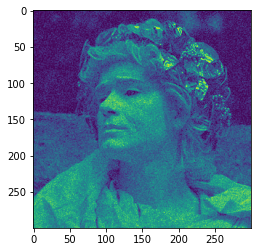

In [133]:
print("Real image")
plt.imshow(image)


 gaussian filter with ksize=5, sigma=3.0


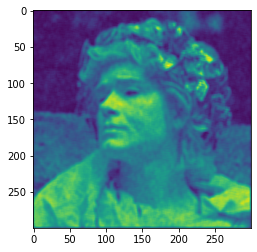

In [134]:
print(" gaussian filter with ksize=5, sigma=3.0")
plt.imshow(result) #shows blured image

 mean filter with ksize=3


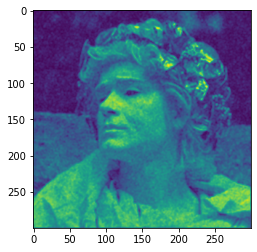

In [135]:
print(" mean filter with ksize=3")
plt.imshow(result2) #shows blured image

In [136]:
# Test the function with a 5x5 kernel size and sigma=1.0
kernel1 = create_gaussian_filter(ksize=7, sigma=9.0)
kernel2 = create_mean_filter(ksize=7)
print("firsttt kernell")
print(kernel1)
print("seconddd kernell")
print(kernel2)
image = cv2.imread('/content/R.jfif',  cv2.IMREAD_GRAYSCALE)
result1 = correlate2d(image, kernel1, mode='same')
result2 = correlate2d(image, kernel2, mode='same')
print("Firsttt Resulttt")
print(result1)
print("seconddd Resulttt")
print(result2)


firsttt kernell
[[0.02039883 0.02103824 0.02143147 0.02156417 0.02143147 0.02103824
  0.02039883]
 [0.01977886 0.02039883 0.02078011 0.02090878 0.02078011 0.02039883
  0.01977886]
 [0.01941595 0.02002455 0.02039883 0.02052514 0.02039883 0.02002455
  0.01941595]
 [0.01929647 0.01990133 0.0202733  0.02039883 0.0202733  0.01990133
  0.01929647]
 [0.01941595 0.02002455 0.02039883 0.02052514 0.02039883 0.02002455
  0.01941595]
 [0.01977886 0.02039883 0.02078011 0.02090878 0.02078011 0.02039883
  0.01977886]
 [0.02039883 0.02103824 0.02143147 0.02156417 0.02143147 0.02103824
  0.02039883]]
seconddd kernell
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040

Real image


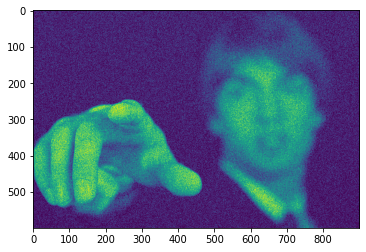

In [137]:
print("Real image")
plt.imshow(image)

Mean filter with ksize=7


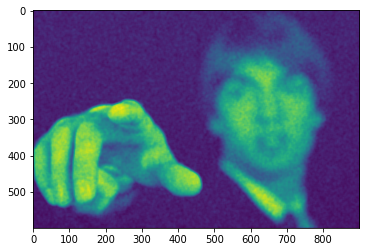

In [138]:
print("Mean filter with ksize=7")
plt.imshow(result2)

 gaussian filter with ksize=7, sigma=9.0


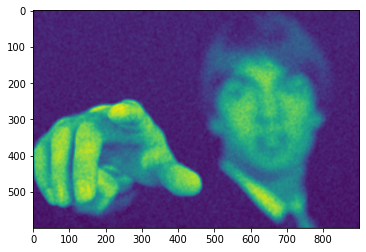

In [139]:
print(" gaussian filter with ksize=7, sigma=9.0")
plt.imshow(result1)

In [140]:
# Test the function with a 5x5 kernel size and sigma=1.0
kernel1 = create_gaussian_filter(ksize=11, sigma=2.0)
kernel2 = create_mean_filter(ksize=11)
print("firsttt kernell")
print(kernel1)
print("seconddd kernell")
print(kernel2)
image = cv2.imread('/content/R (1).jfif',  cv2.IMREAD_GRAYSCALE)
result1 = correlate2d(image, kernel1, mode='same')
result2 = correlate2d(image, kernel2, mode='same')
print("Firsttt Resulttt")
print(result1)
print("seconddd Resulttt")
print(result2)


firsttt kernell
[[0.00274664 0.00846025 0.02029508 0.03791621 0.05516776 0.06251326
  0.05516776 0.03791621 0.02029508 0.00846025 0.00274664]
 [0.0008917  0.00274664 0.00658885 0.01230959 0.01791035 0.02029508
  0.01791035 0.01230959 0.00658885 0.00274664 0.0008917 ]
 [0.00037172 0.00114497 0.00274664 0.0051314  0.00746614 0.00846025
  0.00746614 0.0051314  0.00274664 0.00114497 0.00037172]
 [0.00019897 0.00061286 0.00147017 0.00274664 0.00399634 0.00452845
  0.00399634 0.00274664 0.00147017 0.00061286 0.00019897]
 [0.00013675 0.00042121 0.00101043 0.00188774 0.00274664 0.00311235
  0.00274664 0.00188774 0.00101043 0.00042121 0.00013675]
 [0.00012068 0.00037172 0.0008917  0.00166592 0.0024239  0.00274664
  0.0024239  0.00166592 0.0008917  0.00037172 0.00012068]
 [0.00013675 0.00042121 0.00101043 0.00188774 0.00274664 0.00311235
  0.00274664 0.00188774 0.00101043 0.00042121 0.00013675]
 [0.00019897 0.00061286 0.00147017 0.00274664 0.00399634 0.00452845
  0.00399634 0.00274664 0.00147017

Real image


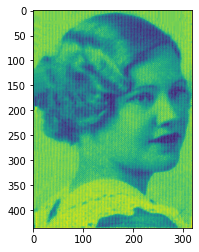

In [141]:
print("Real image")
plt.imshow(image)

Mean filter with ksize=11


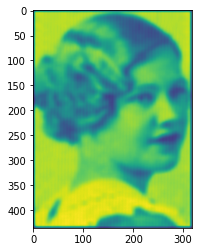

In [142]:
print("Mean filter with ksize=11")
plt.imshow(result2)

 gaussian filter with ksize=11, sigma=2.0


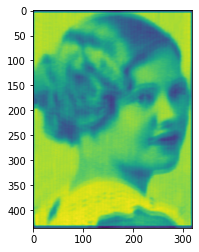

In [143]:
print(" gaussian filter with ksize=11, sigma=2.0")
plt.imshow(result1)